# Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [5]:
df = df = pd.read_csv('buyer_guide.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Initial visual analysis

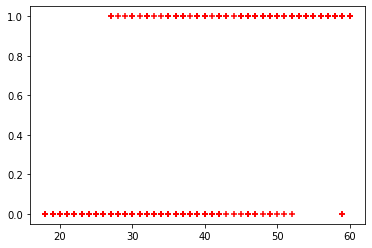

In [7]:
plt.scatter(df.Age,df.Purchased,marker='+',color='red')

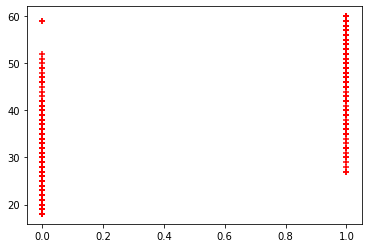

In [8]:
plt.scatter(df.Purchased,df.Age,marker='+',color='red')

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

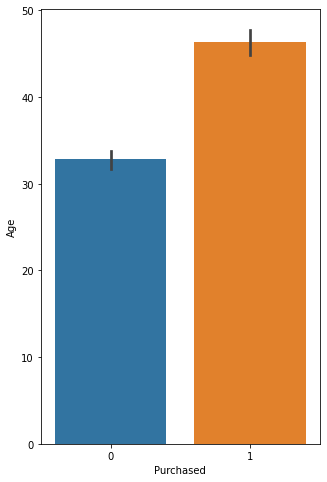

In [9]:
# Relationship between age and purchasing decision

fig = plt.figure(figsize = (5,8))
sns.barplot(x = 'Purchased', y = 'Age', data = df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

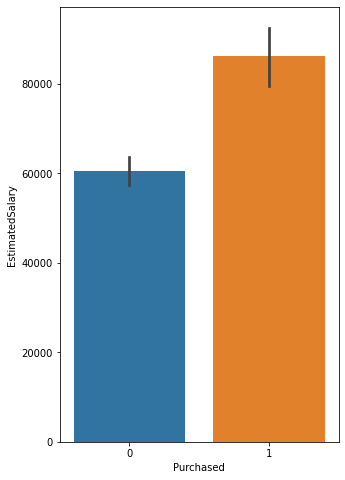

In [10]:
# Relationship between estimated salary and purchasing decision

fig = plt.figure(figsize = (5,8))
sns.barplot(x = 'Purchased', y = 'EstimatedSalary', data = df)

<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

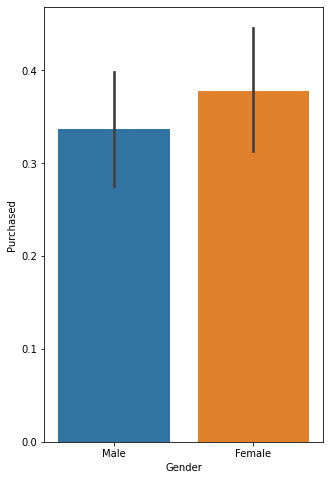

In [11]:
# Relationship between gender and purchasing decision

fig = plt.figure(figsize = (5,8))
sns.barplot(x = 'Gender', y = 'Purchased', data = df)

# Feature selection

In [12]:
# splitting dataset into features and target variable

X = df[df.columns[2:-1]]   # Features
y = df.Purchased           # Target variable

# Splitting data

In [13]:
# splitting dataset into training(80%) and testing(20%) sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
X_train

,Age,EstimatedSalary
137,30,107000
272,60,42000
211,52,150000
397,50,20000
56,23,48000
...,...,...
179,31,34000
327,42,75000
315,39,75000
249,35,97000


In [15]:
X_test

,Age,EstimatedSalary
217,40,78000
155,31,15000
251,37,52000
164,33,69000
113,37,55000
...,...,...
351,37,75000
193,19,70000
18,46,28000
162,37,33000


# Experimenting with different algorithms

In [16]:
# Logistic Regression

LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)
predicted_LogReg_model = LogReg_model.predict(X_test)
print(classification_report(y_test, predicted_LogReg_model))
cross_val = cross_val_score(estimator=LogReg_model, X=X_train,y=y_train,cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        49
           1       0.00      0.00      0.00        31

    accuracy                           0.61        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.38      0.61      0.47        80

0.65


In [17]:
# K-Nearest-Neighbour (KNN)

KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train, y_train)
pred_KNN_model = KNN_model.predict(X_test)
print(classification_report(y_test,pred_KNN_model))
cross_val = cross_val_score(estimator = KNN_model, X=X_train,y=y_train,cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        49
           1       0.76      0.71      0.73        31

    accuracy                           0.80        80
   macro avg       0.79      0.78      0.79        80
weighted avg       0.80      0.80      0.80        80

0.8


In [18]:
# Random Forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
cross_val = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        49
           1       0.84      0.87      0.86        31

    accuracy                           0.89        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80

0.890625


In [19]:
# Stochastic Gradient Descent classifier

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=X_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.39      1.00      0.56        31

    accuracy                           0.39        80
   macro avg       0.19      0.50      0.28        80
weighted avg       0.15      0.39      0.22        80

0.49375


As we can see from the above results, random forest classifier is the most efficient algorithm as compared to other's, hence we will proceed with that.

# Steps to improve results

In [20]:
# Improving results by using Randomized SearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rfc_optimized = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rfc_optimized.fit(X_train, y_train)
pred_optimized = rfc_optimized.predict(X_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   0.4s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   0.5s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=6

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=472; total time=   0.4s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=76, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=155; total time=   0.0s
[CV] END bootstrap=True, max_depth=76, max

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=366; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=65, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=261; total time=   0.2s
[CV] END bootstrap=True, max_depth=6

[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   0.5s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   0.4s
[CV] END bootstrap=False, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=683; total time=   0.5s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=577; total time=   0.7s
[CV] END bootstrap=True, max_depth=11

[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, max_depth=54, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=366; total time=   0.4s
[CV] END bootstrap=True, max_depth=32, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=788; total time=   0.8s
[CV] END bootstrap=True, max_dept

In [25]:
print(classification_report(y_test, pred_optimized))
print(rfc_optimized.best_params_)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.90      0.93      0.92        29

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 32, 'bootstrap': True}


In [21]:
rfeval = cross_val_score(estimator=rfc, X = X_train, y=y_train, cv=10)
rfeval.mean()

0.8875

In [22]:
# By using the above mentioned (tuned) hyperparameters

rf_optimized = RandomForestClassifier(n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features='auto', max_depth = 32, bootstrap = True)
rf_optimized.fit(X_train, y_train)

rfeval = cross_val_score(estimator=rf_optimized, X=X_train, y=y_train, cv=10)
rfeval.mean()

0.909375

# Confusion matrix

In [23]:
from sklearn import metrics

Confusion_Matrix = metrics.confusion_matrix(y_test, pred_rfc)

In [24]:
Confusion_Matrix

array([[44,  5],
       [ 4, 27]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

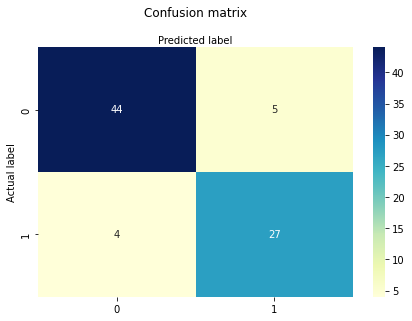

In [25]:
# Visual representation of confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating heatmap
sns.heatmap(pd.DataFrame(Confusion_Matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Accuracy, Precision and Recall

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_rfc))
print("Precision:",metrics.precision_score(y_test, pred_rfc))
print("Recall:",metrics.recall_score(y_test, pred_rfc))

Accuracy: 0.8875
Precision: 0.84375
Recall: 0.8709677419354839


In [27]:
import pickle

In [31]:
pickle_out = open("classifier.pkl","wb")
pickle.dump(rf_optimized, pickle_out)
pickle_out.close()

In [32]:
rf_optimized.predict([[23,12344]])

array([0], dtype=int64)